<a href="https://colab.research.google.com/github/pelka-izabella/miscellaneous/blob/main/Pelka_Izabella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Izabella Pełka

Assignment:

The NG technical test for data science interview consists in building an end to end ML pipeline that takes a raw dataset Dataset.csv (joined), containing a commodity price values from 3 different markets, and forecasts the open to open price movement direction for market 2, for the next day, based on the data.



It is a binary classification problem. The models performances will be assessed over the last 50 days (validation set), given a metric defined by the candidate. The choice of the model is up to the candidate.


The results will be returned in a jupyter notebook (.ipynb file) with cells that have the results saved in, that will be discussed together.


No need to use exterior data. 



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter

# Data

In [ ]:
df = pd.read_csv('Dataset.csv')

In [ ]:
df.head()

,DateTime,Market1: Close,Market1: High,Market1: Low,Market1: Open,Market2: Close,Market2: High,Market2: Low,Market2: Open,Market2: Open_Interest,Market2: Volume,Market3: Close,Market3: High,Market3: Low,Market3: Open,Market3: Open_Interest,Market3: Volume
0,2015-01-05T00:00:00.000,276.60,282.70,274.40,281.40,6145.0,6275.5,6095.50,6255.0,301759.0,78077.0,45250.0,45570.0,44990.0,45500.0,704092.0,189194.0
1,2015-01-06T00:00:00.000,276.70,278.20,275.65,276.95,6145.0,6178.0,6114.00,6150.0,299683.0,50088.0,44570.0,44910.0,43980.0,44210.0,698540.0,447986.0
2,2015-01-07T00:00:00.000,275.85,277.65,274.80,276.00,6115.0,6151.5,6091.50,6130.0,297582.0,53173.0,44660.0,44840.0,44420.0,44640.0,700286.0,317816.0
3,2015-01-08T00:00:00.000,276.95,279.40,275.35,276.40,6104.0,6189.0,6103.85,6126.5,300723.0,55424.0,44740.0,44890.0,44580.0,44650.0,695008.0,208524.0
4,2015-01-09T00:00:00.000,275.45,277.60,273.85,276.70,6090.0,6148.5,6073.50,6132.0,303841.0,48765.0,44550.0,45050.0,44250.0,45000.0,725376.0,384066.0


In [ ]:
# lowercasing column names and replacing ": " with underscore for convenience
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(": ", "_")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               1607 non-null   object 
 1   market1_close          1555 non-null   float64
 2   market1_high           1555 non-null   float64
 3   market1_low            1555 non-null   float64
 4   market1_open           1555 non-null   float64
 5   market2_close          1563 non-null   float64
 6   market2_high           1563 non-null   float64
 7   market2_low            1563 non-null   float64
 8   market2_open           1563 non-null   float64
 9   market2_open_interest  1548 non-null   float64
 10  market2_volume         1563 non-null   float64
 11  market3_close          1503 non-null   float64
 12  market3_high           1503 non-null   float64
 13  market3_low            1503 non-null   float64
 14  market3_open           1502 non-null   float64
 15  mark

In [ ]:
# assigning a correct type
df['datetime'] = df['datetime'].astype('datetime64[ns]')

In [ ]:
df['datetime'].min()

Timestamp('2015-01-05 00:00:00')

In [ ]:
df['datetime'].max()

Timestamp('2021-03-08 00:00:00')

In [ ]:
df.fillna(method='ffill', inplace=True)

The file contains daily data of close, high, low and open prices prices for 3 markets, as well as open interest values for Markets 2&3, and volume for Market 3. The time scope of the study is between 1st of May 2015 and 8th of March 2021. 

The DateTime column was turned into a datetime type, the other columns had already been correctly identified as float types.

There were missing values in the numerical columns and I decided to fill them using a forward fill, assuming that if the price is missing for a certain day, last known piece of information is still valid. 



In [ ]:
# label preparation
df['open2_diff'] = df['market2_open'].diff(1)
df['label'] = np.where(df['open2_diff']>0, 1, 0)
df.head()

,datetime,market1_close,market1_high,market1_low,market1_open,market2_close,market2_high,market2_low,market2_open,market2_open_interest,market2_volume,market3_close,market3_high,market3_low,market3_open,market3_open_interest,market3_volume,open2_diff,label
0,2015-01-05,276.60,282.70,274.40,281.40,6145.0,6275.5,6095.50,6255.0,301759.0,78077.0,45250.0,45570.0,44990.0,45500.0,704092.0,189194.0,NaN,0
1,2015-01-06,276.70,278.20,275.65,276.95,6145.0,6178.0,6114.00,6150.0,299683.0,50088.0,44570.0,44910.0,43980.0,44210.0,698540.0,447986.0,-105.0,0
2,2015-01-07,275.85,277.65,274.80,276.00,6115.0,6151.5,6091.50,6130.0,297582.0,53173.0,44660.0,44840.0,44420.0,44640.0,700286.0,317816.0,-20.0,0
3,2015-01-08,276.95,279.40,275.35,276.40,6104.0,6189.0,6103.85,6126.5,300723.0,55424.0,44740.0,44890.0,44580.0,44650.0,695008.0,208524.0,-3.5,0
4,2015-01-09,275.45,277.60,273.85,276.70,6090.0,6148.5,6073.50,6132.0,303841.0,48765.0,44550.0,45050.0,44250.0,45000.0,725376.0,384066.0,5.5,1


If current open price for Market 2 is higher than previous the label holds 1, otherwise 0. Therefore in my classiffication I am targeting a rise in price. 

# EDA

In [ ]:
df.describe()

,market1_close,market1_high,market1_low,market1_open,market2_close,market2_high,market2_low,market2_open,market2_open_interest,market2_volume,market3_close,market3_high,market3_low,market3_open,market3_open_interest,market3_volume,open2_diff,label
count,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1.607000e+03,1606.000000,1607.000000
mean,269.216366,271.615059,266.617735,269.105352,5958.873055,6013.443404,5904.896920,5959.219508,308347.436839,45054.978220,46307.137523,46634.542626,45970.136901,46282.538892,578686.029869,1.649789e+05,1.773973,0.485999
std,38.590871,38.854545,38.149873,38.439020,849.111076,855.442875,841.595981,847.627423,24560.693539,17798.853472,6210.457288,6242.168954,6161.083320,6193.327056,157716.570568,1.539928e+05,72.418382,0.499960
min,194.350000,198.000000,193.550000,193.850000,4331.000000,4394.000000,4318.000000,4332.500000,249719.000000,7805.000000,33530.000000,34020.000000,33150.000000,33530.000000,269483.000000,7.218000e+03,-376.000000,0.000000
25%,247.150000,249.925000,243.125000,246.575000,5448.750000,5511.500000,5362.500000,5442.500000,290514.000000,34167.500000,41765.000000,42020.000000,41430.000000,41800.000000,499386.000000,6.440600e+04,-37.500000,0.000000
50%,267.450000,269.550000,265.200000,267.500000,5927.000000,5968.000000,5876.500000,5925.000000,306761.000000,42218.000000,47160.000000,47430.000000,46930.000000,47150.000000,588584.000000,1.113280e+05,0.000000,0.000000
75%,292.025000,294.325000,289.700000,292.275000,6469.500000,6506.500000,6408.000000,6463.750000,326051.000000,53420.500000,50340.000000,50720.000000,50030.000000,50370.000000,703594.000000,2.129560e+05,40.875000,1.000000
max,429.450000,436.300000,419.550000,430.800000,9412.500000,9617.000000,9315.000000,9450.000000,378509.000000,192388.000000,69380.000000,70440.000000,68950.000000,70080.000000,952018.000000,1.319384e+06,433.000000,1.000000


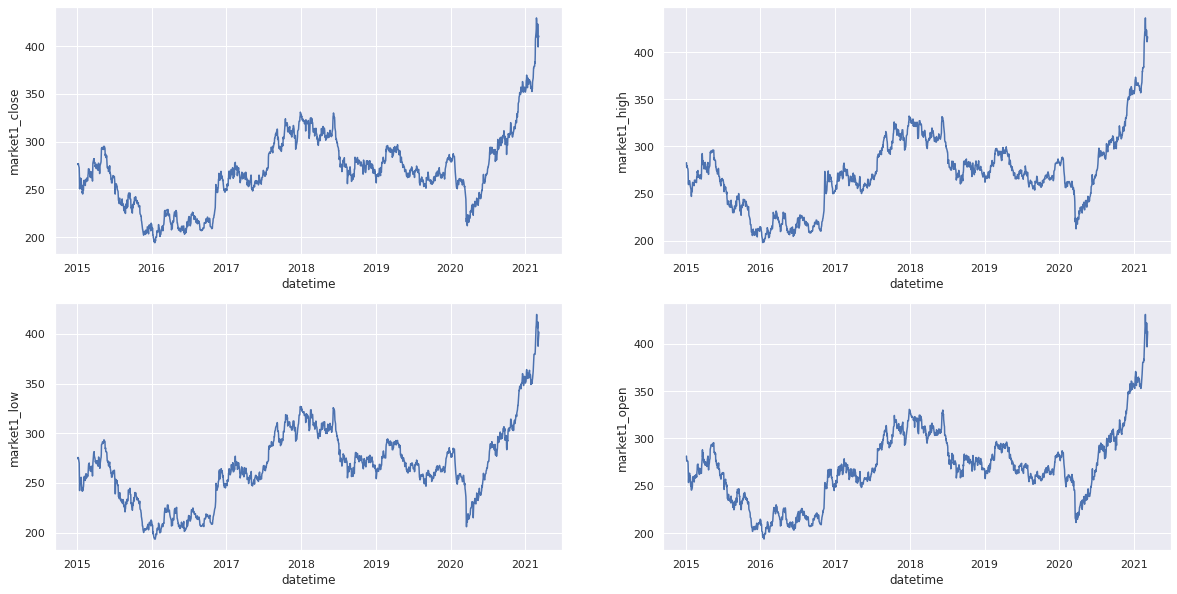

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.lineplot(data = df, x='datetime', y='market1_close' , ax=axs[0, 0])
sns.lineplot(data = df, x='datetime', y="market1_high", ax=axs[0, 1])
sns.lineplot(data = df, x='datetime', y="market1_low", ax=axs[1, 0])
sns.lineplot(data = df, x='datetime', y="market1_open", ax=axs[1, 1])

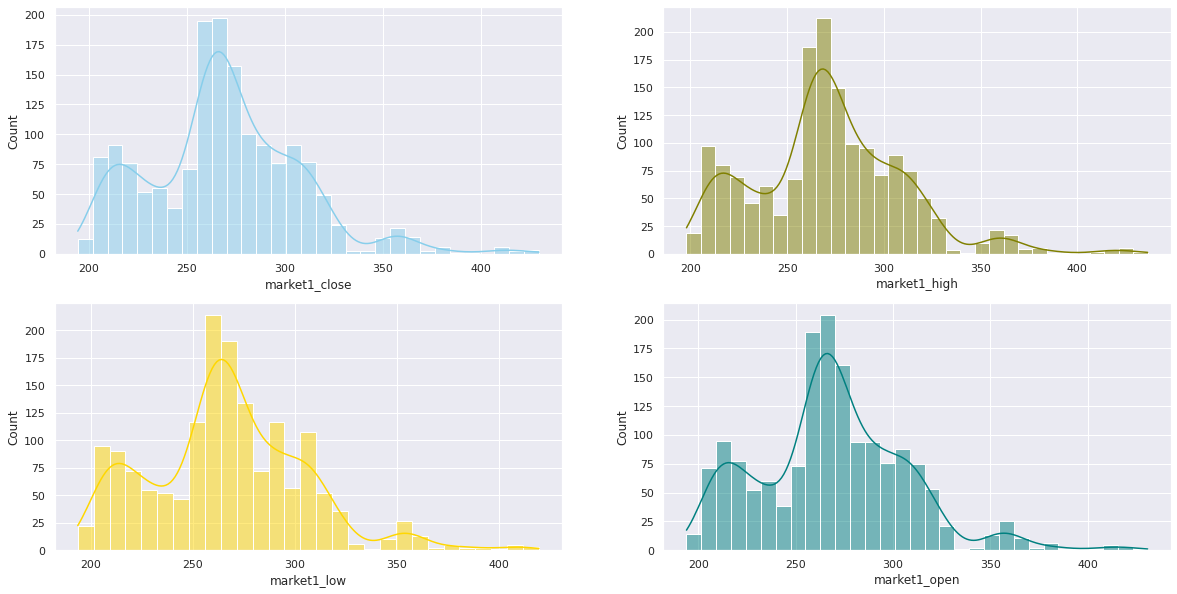

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.histplot(data=df, x="market1_close", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="market1_high", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="market1_low", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="market1_open", kde=True, color="teal", ax=axs[1, 1])

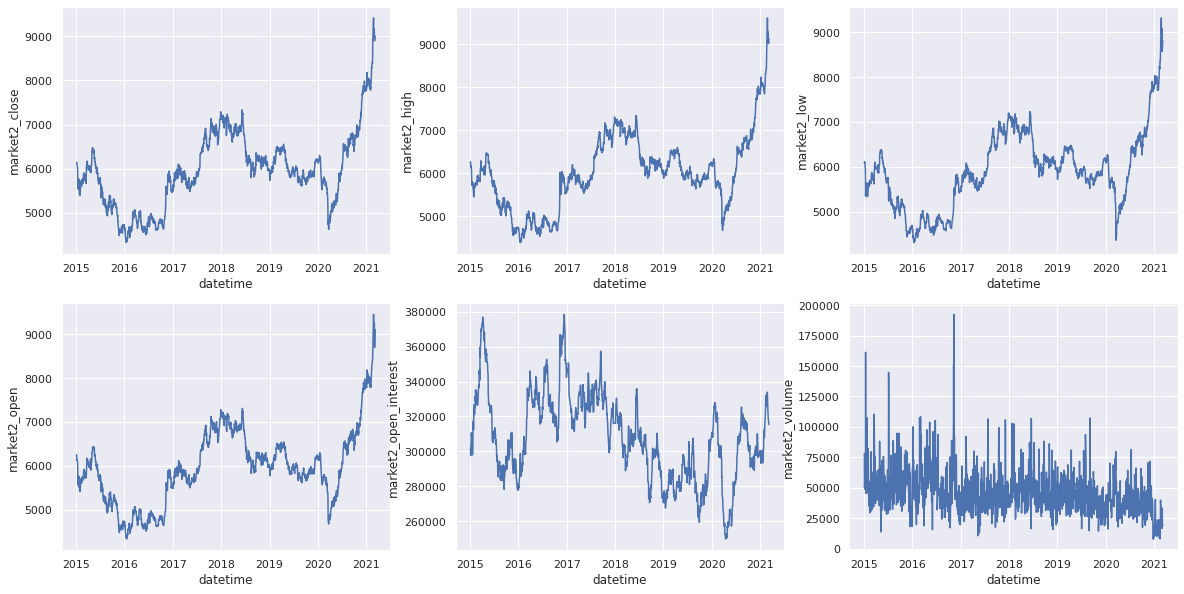

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.lineplot(data = df, x='datetime', y='market2_close' , ax=axs[0, 0])
sns.lineplot(data = df, x='datetime', y="market2_high", ax=axs[0, 1])
sns.lineplot(data = df, x='datetime', y="market2_low", ax=axs[0,2])
sns.lineplot(data = df, x='datetime', y="market2_open", ax=axs[1, 0])
sns.lineplot(data = df, x='datetime', y="market2_open_interest", ax=axs[1,1])
sns.lineplot(data = df, x='datetime', y="market2_volume", ax=axs[1, 2])

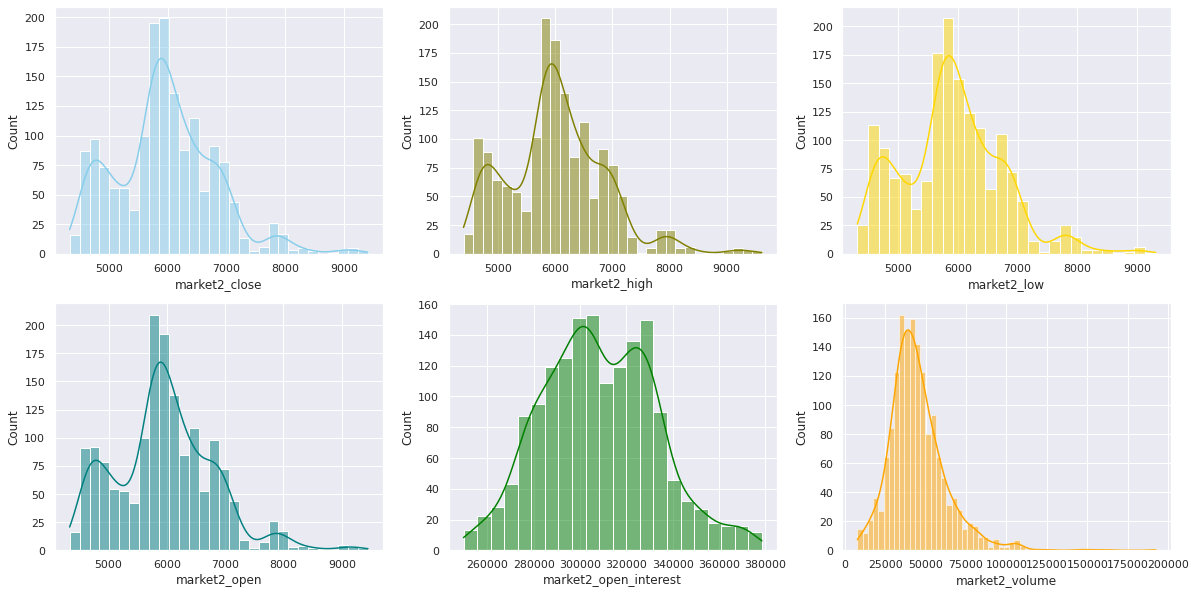

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(data=df, x="market2_close", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="market2_high", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="market2_low", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="market2_open", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="market2_open_interest", kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=df, x="market2_volume", kde=True, color="orange", ax=axs[1, 2])

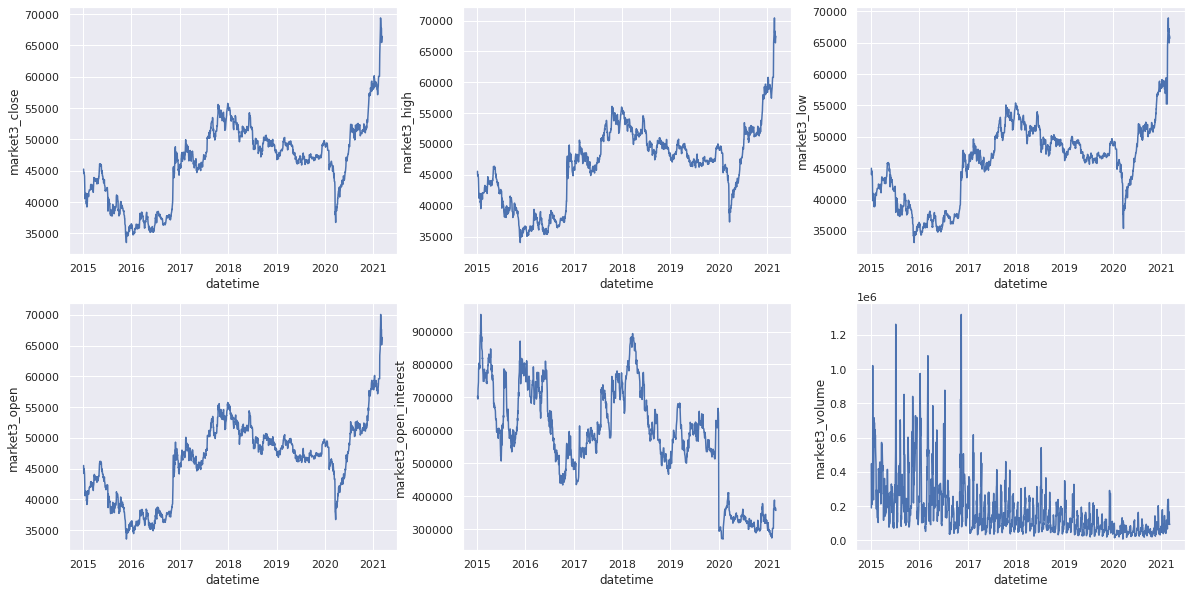

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.lineplot(data = df, x='datetime', y='market3_close' , ax=axs[0, 0])
sns.lineplot(data = df, x='datetime', y="market3_high", ax=axs[0, 1])
sns.lineplot(data = df, x='datetime', y="market3_low", ax=axs[0,2])
sns.lineplot(data = df, x='datetime', y="market3_open", ax=axs[1, 0])
sns.lineplot(data = df, x='datetime', y="market3_open_interest", ax=axs[1,1])
sns.lineplot(data = df, x='datetime', y="market3_volume", ax=axs[1, 2])

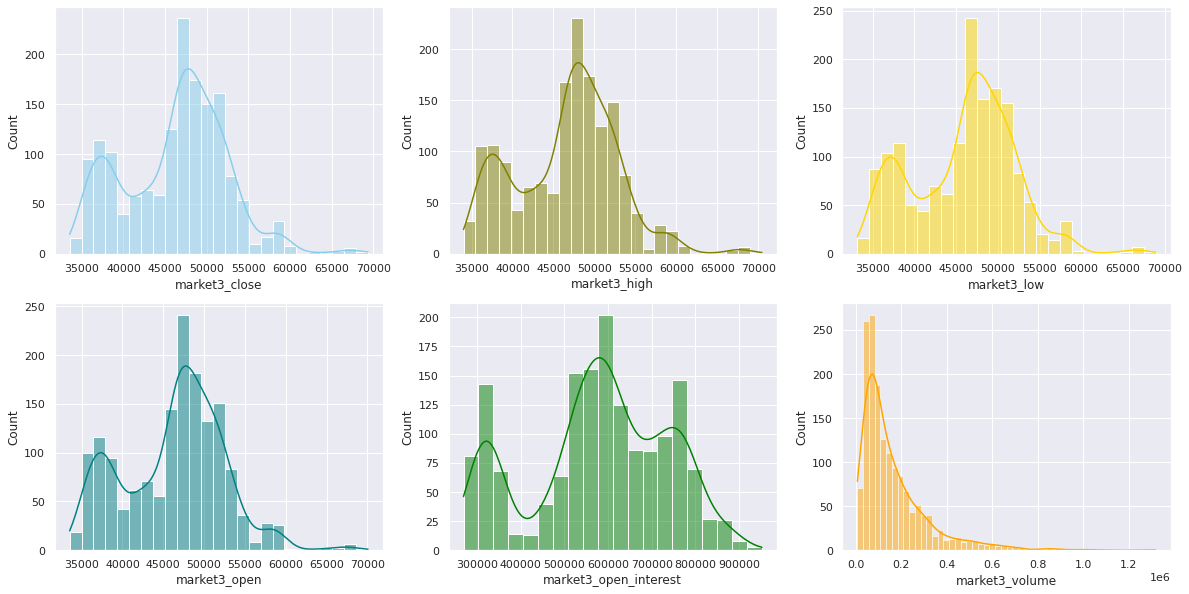

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(data=df, x="market3_close", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="market3_high", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="market3_low", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="market3_open", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="market3_open_interest", kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=df, x="market3_volume", kde=True, color="orange", ax=axs[1, 2])

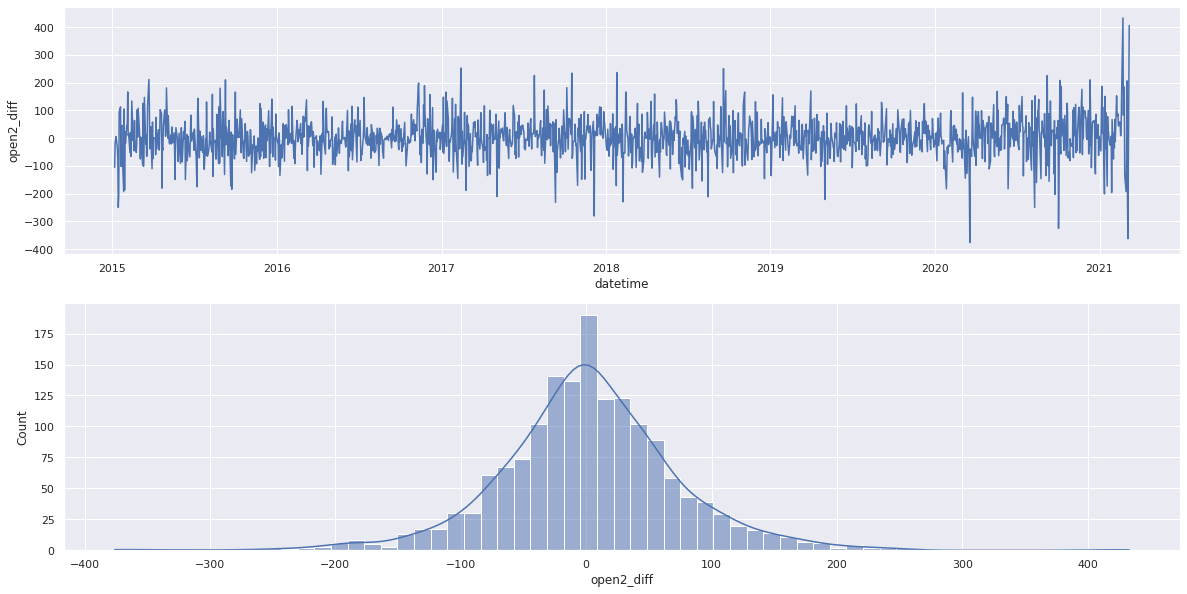

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

sns.lineplot(data = df, x='datetime', y='open2_diff' , ax=axs[0])
sns.histplot(data = df, x='open2_diff' , kde=True,  ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


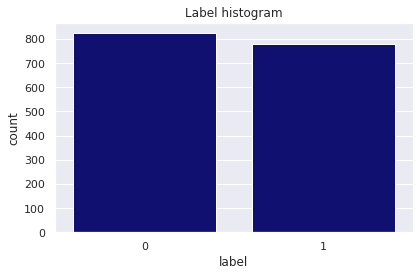

In [ ]:
fig, ax = plt.subplots()
sns.countplot(df['label'], color='navy')

ax.set_xlabel('label')
ax.set_ylabel('count')
ax.set_title(r'Label histogram')

fig.tight_layout()
plt.show()

In [ ]:
Counter(df['label'])

Counter({0: 826, 1: 781})

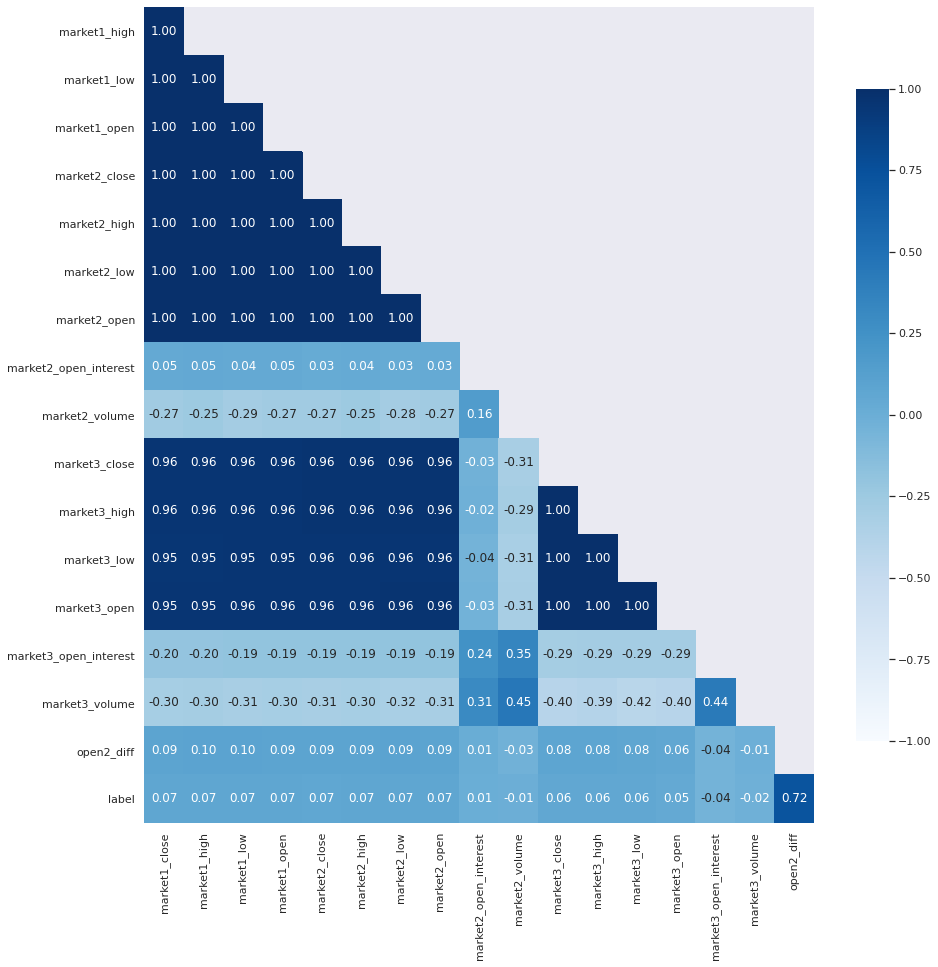

In [ ]:
# correlation
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(15, 15))
# mask to get only bottom half
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()